# Analytic form factors (spheres, shells, disk)
This notebook compares implemented analytic models.

We emphasize three quantities:
- $\mathrm{Re}[F(q)]$
- $|F(q)|$
- $|F(q)|^2$

For the disk, the viewer currently uses the quick-look approximation $q_\perp \approx |q|$.

In [2]:
from _bootstrap import add_src_to_path
repo_root = add_src_to_path()

import numpy as np
import matplotlib.pyplot as plt

from rayleigh_gans.form_factors import (
    q_from_theta,
    F_sphere_q,
    F_thin_spherical_shell_q,
    F_thick_spherical_shell_q,
    F_disk_q,
)

plt.rcParams["figure.dpi"] = 120

## Compare geometries vs q (fixed size)
Pick a size and compare $|F(q)|^2$ for several geometries.

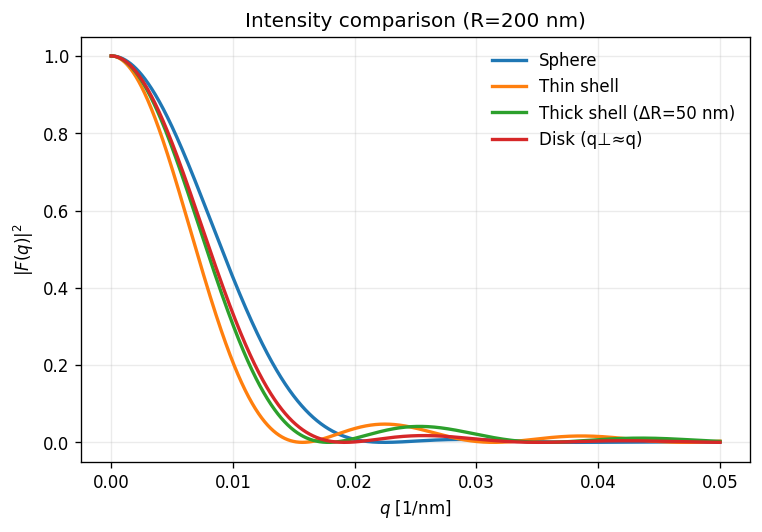

In [4]:
R = 200.0      # nm
dR = 50.0      # nm, thickness (for thick shell)
q = np.linspace(0, 0.05, 3000)

F_sphere = F_sphere_q(q, R)
F_thin = F_thin_spherical_shell_q(q, R)
F_thick = F_thick_spherical_shell_q(q, r_inner=max(1e-9, R-dR), r_outer=R)
F_disk = F_disk_q(q, R)

plt.figure(figsize=(7.2,4.6))
plt.plot(q, np.abs(F_sphere)**2, label="Sphere", linewidth=2.0)
plt.plot(q, np.abs(F_thin)**2, label="Thin shell", linewidth=2.0)
plt.plot(q, np.abs(F_thick)**2, label=f"Thick shell (ΔR={dR:g} nm)", linewidth=2.0)
plt.plot(q, np.abs(F_disk)**2, label="Disk (q⊥≈q)", linewidth=2.0)

plt.xlabel(r"$q$ [1/nm]")
plt.ylabel(r"$|F(q)|^2$")
plt.title(f"Intensity comparison (R={R:g} nm)")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.show()


## Radius sweep at a fixed scattering condition
Your earlier notebook swept **radius** at a *fixed* scattering condition (θ, λ, n).

That corresponds to fixing **q** (since q is determined by θ, λ, n) and plotting $|F(qR)|^2$ as R varies.

Below we do exactly that, but in a more explicit way.

In [5]:
# Fixed experimental condition (radians):
nm = 1.33
wavelength = 532.0  # nm
theta = np.pi/2     # 90 degrees

q0 = q_from_theta(theta, nm=nm, wavelength=wavelength)
q0


np.float64(0.022214414690791835)

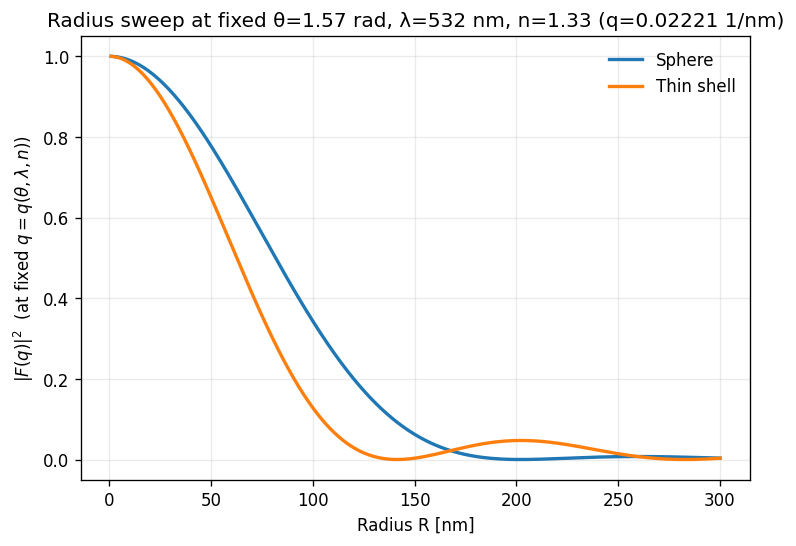

In [9]:
R = np.linspace(1.0, 300.0, 1000) 
F_sphere = F_sphere_q(q0, R)  # broadcasting: q0 scalar, R array
F_thin = F_thin_spherical_shell_q(q0, R)

I_sphere = np.abs(F_sphere)**2
I_thin = np.abs(F_thin)**2

plt.figure(figsize=(7.2,4.8))
plt.plot(R, I_sphere, label="Sphere", linewidth=2.0)
plt.plot(R, I_thin, label="Thin shell", linewidth=2.0)
plt.xlabel("Radius R [nm]")
plt.ylabel(r"$|F(q)|^2$  (at fixed $q=q(\theta,\lambda,n)$)")
plt.title(rf"Radius sweep at fixed θ={theta:.3g} rad, λ={wavelength:g} nm, n={nm:g} (q={q0:.4g} 1/nm)")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.show()


## Amplitude vs intensity
Intensity is often what is measured, but sometimes it's helpful to see the amplitude quantities too.

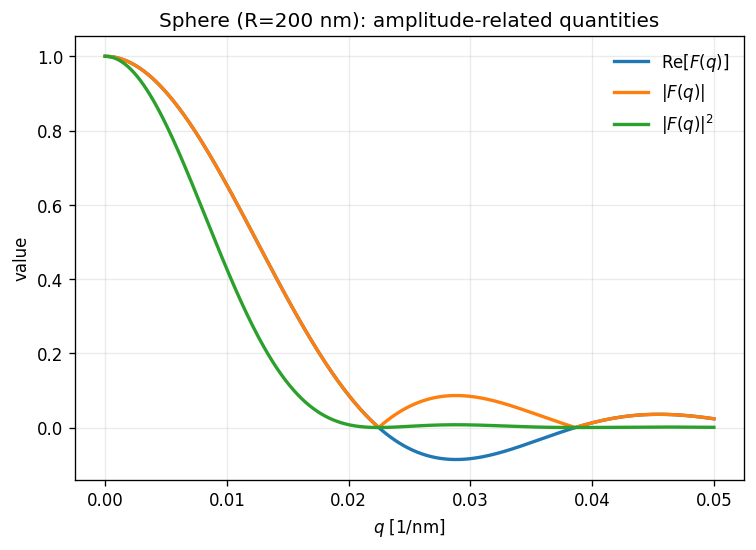

In [11]:
R = 200.0
q = np.linspace(0, 0.05, 2500)
F = F_sphere_q(q, R)

plt.figure(figsize=(7.2,4.8))
plt.plot(q, np.real(F), label=r"$\mathrm{Re}[F(q)]$", linewidth=2.0)
plt.plot(q, np.abs(F), label=r"$|F(q)|$", linewidth=2.0)
plt.plot(q, np.abs(F)**2, label=r"$|F(q)|^2$", linewidth=2.0)
plt.xlabel(r"$q$ [1/nm]")
plt.ylabel("value")
plt.title(f"Sphere (R={R:g} nm): amplitude-related quantities")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.show()
